<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week6.do.txt --no_mako -->
<!-- dom:TITLE: Advanced machine learning and data analysis for the physical sciences -->

# Advanced machine learning and data analysis for the physical sciences
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway

Date: **February 27, 2025**

## Plans for the week February 24-28, 2025

1. Intro to and mathematics of  Recurrent Neural Networks (RNNs)
<!-- o [Video of lecture](https://youtu.be/DhuQ1H9RwfQ) -->
<!-- o [Whiteboard notes](https://github.com/CompPhysics/AdvancedMachineLearning/blob/main/doc/HandwrittenNotes/2025/NotesFebruary13.pdf) -->

## Reading recommendations

1. For RNNs, see Goodfellow et al chapter 10.

2. Reading suggestions for implementation of RNNs in PyTorch: [See Rashcka et al.'s chapter 15 and GitHub site](https://github.com/rasbt/machine-learning-book/tree/main/ch15).

## TensorFlow examples
For TensorFlow (using Keras) implementations, we recommend
1. [David Foster Generative Learning, see chapters 2 and 3 from the GitHub link](https://github.com/davidADSP/Generative_Deep_Learning_2nd_Edition/tree/main/notebooks/02_deeplearning/02_cnn)

2. [Joseph Babcock and Raghav Bali Generative AI with Python and their GitHub link, chapter 3](https://github.com/raghavbali/generative_ai_with_tensorflow)

## From NNs and CNNs to recurrent neural networks (RNNs)

There are limitation of NNs, one of which being that FFNNs are not
designed to handle sequential data (data for which the order matters)
effectively because they lack the capabilities of storing information
about previous inputs; each input is being treated indepen-
dently. This is a limitation when dealing with sequential data where
past information can be vital to correctly process current and future
inputs.

## Feedback connections

In contrast to NNs, recurrent networks introduce feedback
connections, meaning the information is allowed to be carried to
subsequent nodes across different time steps. These cyclic or feedback
connections have the objective of providing the network with some kind
of memory, making RNNs particularly suited for time- series data,
natural language processing, speech recognition, and several other
problems for which the order of the data is crucial.  The RNN
architectures vary greatly in how they manage information flow and
memory in the network.

## Vanishing gradients

Different architectures often aim at improving
some sub-optimal characteristics of the network. The simplest form of
recurrent network, commonly called simple or vanilla RNN, for example,
is known to suffer from the problem of vanishing gradients. This
problem arises due to the nature of backpropagation in time. Gradients
of the cost/loss function may get exponentially small (or large) if
there are many layers in the network, which is the case of RNN when
the sequence gets long.

## Recurrent neural networks (RNNs): Overarching view

Till now our focus has been, including convolutional neural networks
as well, on feedforward neural networks. The output or the activations
flow only in one direction, from the input layer to the output layer.

A recurrent neural network (RNN) looks very much like a feedforward
neural network, except that it also has connections pointing
backward. 

RNNs are used to analyze time series data such as stock prices, and
tell you when to buy or sell. In autonomous driving systems, they can
anticipate car trajectories and help avoid accidents. More generally,
they can work on sequences of arbitrary lengths, rather than on
fixed-sized inputs like all the nets we have discussed so far. For
example, they can take sentences, documents, or audio samples as
input, making them extremely useful for natural language processing
systems such as automatic translation and speech-to-text.

## Sequential data only?

An important issue is that in many deep learning methods we assume
that the input and output data can be treated as independent and
identically distributed, normally abbreviated to **iid**.
This means that the data we use can be seen as mutually independent.

This is however not the case for most data sets used in RNNs since we
are dealing with sequences of data with strong inter-dependencies.
This applies in particular to time series, which are sequential by
contruction.

## Differential equations

As an example, the solutions of ordinary differential equations can be
represented as a time series, similarly, how stock prices evolve as
function of time is another example of a typical time series, or voice
records and many other examples.

Not all sequential data may however have a time stamp, texts being a
typical example thereof, or DNA sequences.

The main focus here is on data that can be structured either as time
series or as ordered series of data.  We will not focus on for example
natural language processing or similar data sets.

## A simple regression example using TensorFlow with Keras

/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457 (5.69 KB)

 Trainable params: 1,457 (5.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 - 1s - 21ms/step - loss: 0.5779
Epoch 2/100
50/50 - 0s - 7ms/step - loss: 0.4268
Epoch 3/100
50/50 - 0s - 7ms/step - loss: 0.4215
Epoch 4/100
50/50 - 0s - 7ms/step - loss: 0.4217
Epoch 5/100
50/50 - 0s - 8ms/step - loss: 0.4168
Epoch 6/100
50/50 - 0s - 8ms/step - loss: 0.4166
Epoch 7/100
50/50 - 0s - 8ms/step - loss: 0.4152
Epoch 8/100
50/50 - 0s - 8ms/step - loss: 0.4144
Epoch 9/100
50/50 - 0s - 8ms/step - loss: 0.4131
Epoch 10/100
50/50 - 0s - 8ms/step - loss: 0.4128
Epoch 11/100
50/50 - 0s - 8ms/step - loss: 0.4121
Epoch 12/100
50/50 - 0s - 8ms/step - loss: 0.4111
Epoch 13/100
50/50 - 0s - 8ms/step - loss: 0.4111
Epoch 14/100
50/50 - 0s - 9ms/step - loss: 0.4101
Epoch 15/100
50/50 - 1s - 14ms/step - loss: 0.4094
Epoch 16/100
50/50 - 0s - 9ms/step - loss: 0.4067
Epoch 17/100
50/50 - 0s - 9ms/step - loss: 0.4094
Epoch 18/100
50/50 - 0s - 9ms/step - loss: 0.4075
Epoch 19/100
50/50 - 1s - 10ms/step - loss: 0.4067
Epoch 20/100
50/50 - 0s - 8ms/step - loss: 0.4053
Epoch 

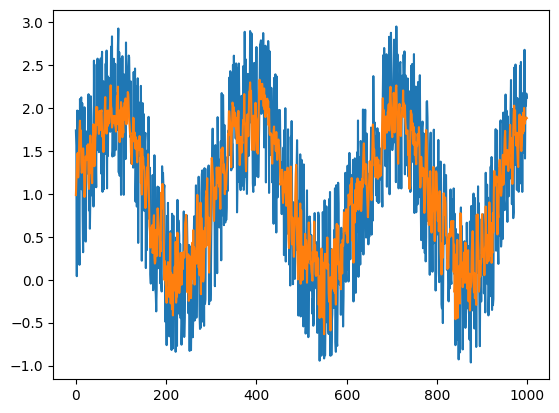

In [1]:
%matplotlib inline

# Start importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras import optimizers     
from tensorflow.keras import regularizers           
from tensorflow.keras.utils import to_categorical 

# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

step = 4
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()
# Setting up training data
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# Defining the model with a simple RNN
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()
# Training
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)
plt.plot(df)
plt.plot(predicted)
plt.show()

## Corresponding example using PyTorch

The structure of the code here is as follows
1. Generate a sine function  and splits it into training and validation sets

2. Create a custom data set for sequence generation

3. Define an RNN model with one RNN layer and a final plain linear layer

4. Train the model using the mean-squared error as cost function and the Adam optimizer

5. Generate predictions using recursive forecasting

6. Plot the results and training/validation loss curves

The model takes sequences of 20 previous values to predict the next
value of the sine function. The recursive prediction uses the model's own
predictions to generate future values, showing how well it maintains
the sine wave pattern over time.

The final plots show the the predicted values vs. the actual sine wave for the validation period
and the training and validation cost function curves to monitor for overfitting.

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic sine wave data
t = torch.linspace(0, 4*np.pi, 1000)
data = torch.sin(t)

# Split data into training and validation
train_data = data[:800]
val_data = data[800:]

# Hyperparameters
seq_len = 20
batch_size = 32
hidden_size = 64
num_epochs = 100
learning_rate = 0.001

# Create dataset and dataloaders
class SineDataset(torch.utils.data.Dataset):
   def __init__(self, data, seq_len):
       self.data = data
       self.seq_len = seq_len

   def __len__(self):
       return len(self.data) - self.seq_len

   def __getitem__(self, idx):
       x = self.data[idx:idx+self.seq_len]
       y = self.data[idx+self.seq_len]
       return x.unsqueeze(-1), y  # Add feature dimension

train_dataset = SineDataset(train_data, seq_len)
val_dataset = SineDataset(val_data, seq_len)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define RNN model
class RNNModel(nn.Module):
   def __init__(self, input_size, hidden_size, output_size):
       super(RNNModel, self).__init__()
       self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
       self.fc = nn.Linear(hidden_size, output_size)

   def forward(self, x):
       out, _ = self.rnn(x)  # out: (batch_size, seq_len, hidden_size)
       out = out[:, -1, :]   # Take last time step output
       out = self.fc(out)
       return out

model = RNNModel(input_size=1, hidden_size=hidden_size, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses = []
val_losses = []

for epoch in range(num_epochs):
   model.train()
   epoch_train_loss = 0
   for x_batch, y_batch in train_loader:
       optimizer.zero_grad()
       y_pred = model(x_batch)
       loss = criterion(y_pred, y_batch.unsqueeze(-1))
       loss.backward()
       optimizer.step()
       epoch_train_loss += loss.item()

   # Validation
   model.eval()
   epoch_val_loss = 0
   with torch.no_grad():
       for x_val, y_val in val_loader:
           y_pred_val = model(x_val)
           val_loss = criterion(y_pred_val, y_val.unsqueeze(-1))
           epoch_val_loss += val_loss.item()

   # Calculate average losses
   train_loss = epoch_train_loss / len(train_loader)
   val_loss = epoch_val_loss / len(val_loader)
   train_losses.append(train_loss)
   val_losses.append(val_loss)

   print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Generate predictions
model.eval()
initial_sequence = train_data[-seq_len:].reshape(1, seq_len, 1)
predictions = []
current_sequence = initial_sequence.clone()

with torch.no_grad():
   for _ in range(len(val_data)):
       pred = model(current_sequence)
       predictions.append(pred.item())
       # Update sequence by removing first element and adding new prediction
       current_sequence = torch.cat([current_sequence[:, 1:, :], pred.unsqueeze(1)], dim=1)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t[800:].numpy(), val_data.numpy(), label='True values')
plt.plot(t[800:].numpy(), predictions, label='Predictions')
plt.title('Sine Wave Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## RNNs

RNNs are very powerful, because they
combine two properties:
1. Distributed hidden state that allows them to store a lot of information about the past efficiently.

2. Non-linear dynamics that allows them to update their hidden state in complicated ways.

With enough neurons and time, RNNs
can compute anything that can be
computed by your computer.

## What kinds of behaviour can RNNs exhibit?

1. They can oscillate. 

2. They can settle to point attractors.

3. They can behave chaotically.

4. RNNs could potentially learn to implement lots of small programs that each capture a nugget of knowledge and run in parallel, interacting to produce very complicated effects.

But the extensive computational needs  of RNNs makes them very hard to train.

## Basic layout,  [Figures from Sebastian Rashcka et al, Machine learning with Sickit-Learn and PyTorch](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html)

<!-- dom:FIGURE: [figslides/RNN1.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN1.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Solving differential equations with RNNs

To gain some intuition on how we can use RNNs for time series, let us
tailor the representation of the solution of a differential equation
as a time series.

Consider the famous differential equation (Newton's equation of motion for damped harmonic oscillations, scaled in terms of dimensionless time)

$$
\frac{d^2x}{dt^2}+\eta\frac{dx}{dt}+x(t)=F(t),
$$

where $\eta$ is a constant used in scaling time into a dimensionless variable and $F(t)$ is an external force acting on the system.
The constant $\eta$ is a so-called damping.

## Two first-order differential equations

In solving the above second-order equation, it is common to rewrite it in terms of two coupled first-order equations
with the velocity

$$
v(t)=\frac{dx}{dt},
$$

and the acceleration

$$
\frac{dv}{dt}=F(t)-\eta v(t)-x(t).
$$

With the initial conditions $v_0=v(t_0)$ and $x_0=x(t_0)$ defined, we can integrate these equations and find their respective solutions.

## Velocity only

Let us focus on the velocity only. Discretizing and using the simplest
possible approximation for the derivative, we have Euler's forward
method for the updated velocity at a time step $i+1$ given by

$$
v_{i+1}=v_i+\Delta t \frac{dv}{dt}_{\vert_{v=v_i}}=v_i+\Delta t\left(F_i-\eta v_i-x_i\right).
$$

Defining a function

$$
h_i(x_i,v_i,F_i)=v_i+\Delta t\left(F_i-\eta v_i-x_i\right),
$$

we have

$$
v_{i+1}=h_i(x_i,v_i,F_i).
$$

## Linking with RNNs

The equation

$$
v_{i+1}=h_i(x_i,v_i,F_i).
$$

can be used to train a feed-forward neural network with inputs $v_i$ and outputs $v_{i+1}$ at a time $t_i$. But we can think of this also as a recurrent neural network
with inputs $v_i$, $x_i$ and $F_i$ at each time step $t_i$, and producing an output $v_{i+1}$.

Noting that

$$
v_{i}=v_{i-1}+\Delta t\left(F_{i-1}-\eta v_{i-1}-x_{i-1}\right)=h_{i-1}.
$$

we have

$$
v_{i}=h_{i-1}(x_{i-1},v_{i-1},F_{i-1}),
$$

and we can rewrite

$$
v_{i+1}=h_i(x_i,h_{i-1},F_i).
$$

## Minor rewrite

We can thus set up a recurring series which depends on the inputs $x_i$ and $F_i$ and the previous values $h_{i-1}$.
We assume now that the inputs at each step (or time $t_i$) is given by $x_i$ only and we denote the outputs for $\tilde{y}_i$ instead of $v_{i_1}$, we have then the compact equation for our outputs at each step $t_i$

$$
y_{i}=h_i(x_i,h_{i-1}).
$$

We can think of this as an element in a recurrent network where our
network (our model) produces an output $y_i$ which is then compared
with a target value through a given cost/loss function that we
optimize. The target values at a given step $t_i$ could be the results
of a measurement or simply the analytical results of a differential
equation.

## RNNs in more detail

<!-- dom:FIGURE: [figslides/RNN2.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN2.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 2

<!-- dom:FIGURE: [figslides/RNN3.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN3.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 3

<!-- dom:FIGURE: [figslides/RNN4.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN4.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 4

<!-- dom:FIGURE: [figslides/RNN5.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN5.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 5

<!-- dom:FIGURE: [figslides/RNN6.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN6.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 6

<!-- dom:FIGURE: [figslides/RNN7.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN7.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## RNNs in more detail, part 7

<!-- dom:FIGURE: [figslides/RNN8.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN8.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Backpropagation through time

We can think of the recurrent net as a layered, feed-forward
net with shared weights and then train the feed-forward net
with weight constraints.

We can also think of this training algorithm in the time domain:
1. The forward pass builds up a stack of the activities of all the units at each time step.

2. The backward pass peels activities off the stack to compute the error derivatives at each time step.

3. After the backward pass we add together the derivatives at all the different times for each weight.

## The backward pass is linear

1. There is a big difference between the forward and backward passes.

2. In the forward pass we use squashing functions (like the logistic) to prevent the activity vectors from exploding.

3. The backward pass, is completely linear. If you double the error derivatives at the final layer, all the error derivatives will double.

The forward pass determines the slope of the linear function used for
backpropagating through each neuron

## The problem of exploding or vanishing gradients
* What happens to the magnitude of the gradients as we backpropagate through many layers?

a. If the weights are small, the gradients shrink exponentially.

b. If the weights are big the gradients grow exponentially.

* Typical feed-forward neural nets can cope with these exponential effects because they only have a few hidden layers.

* In an RNN trained on long sequences (e.g. 100 time steps) the gradients can easily explode or vanish.

a. We can avoid this by initializing the weights very carefully.

* Even with good initial weights, its very hard to detect that the current target output depends on an input from many time-steps ago.

RNNs have difficulty dealing with long-range dependencies.

## Mathematical setup

The expression for the simplest Recurrent network resembles that of a
regular feed-forward neural network, but now with
the concept of temporal dependencies

$$
\begin{align*}
    \mathbf{a}^{(t)} & = U * \mathbf{x}^{(t)} + W * \mathbf{h}^{(t-1)} + \mathbf{b}, \notag \\
    \mathbf{h}^{(t)} &= \sigma_h(\mathbf{a}^{(t)}), \notag\\
    \mathbf{y}^{(t)} &= V * \mathbf{h}^{(t)} + \mathbf{c}, \notag\\
    \mathbf{\hat{y}}^{(t)} &= \sigma_y(\mathbf{y}^{(t)}).
\end{align*}
$$

## Back propagation in time through figures, part 1

<!-- dom:FIGURE: [figslides/RNN9.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN9.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Back propagation in time, part 2

<!-- dom:FIGURE: [figslides/RNN10.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN10.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Back propagation in time, part 3

<!-- dom:FIGURE: [figslides/RNN11.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN11.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Back propagation in time, part 4

<!-- dom:FIGURE: [figslides/RNN12.png, width=700 frac=0.9] -->
<!-- begin figure -->

<img src="figslides/RNN12.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Back propagation in time in equations

To derive the expression of the gradients of $\mathcal{L}$ for
the RNN, we need to start recursively from the nodes closer to the
output layer in the temporal unrolling scheme - such as $\mathbf{y}$
and $\mathbf{h}$ at final time $t = \tau$,

$$
\begin{align*}
    (\nabla_{ \mathbf{y}^{(t)}} \mathcal{L})_{i} &= \frac{\partial \mathcal{L}}{\partial L^{(t)}}\frac{\partial L^{(t)}}{\partial y_{i}^{(t)}}, \notag\\
    \nabla_{\mathbf{h}^{(\tau)}} \mathcal{L} &= \mathbf{V}^\mathsf{T}\nabla_{ \mathbf{y}^{(\tau)}} \mathcal{L}.
\end{align*}
$$

## Chain rule again
For the following hidden nodes, we have to iterate through time, so by the chain rule,

$$
\begin{align*}
    \nabla_{\mathbf{h}^{(t)}} \mathcal{L} &= \left(\frac{\partial\mathbf{h}^{(t+1)}}{\partial\mathbf{h}^{(t)}}\right)^\mathsf{T}\nabla_{\mathbf{h}^{(t+1)}}\mathcal{L} + \left(\frac{\partial\mathbf{y}^{(t)}}{\partial\mathbf{h}^{(t)}}\right)^\mathsf{T}\nabla_{ \mathbf{y}^{(t)}} \mathcal{L}.
\end{align*}
$$

## Gradients of loss functions
Similarly, the gradients of $\mathcal{L}$ with respect to the weights and biases follow,

<!-- Equation labels as ordinary links -->
<div id="eq:rnn_gradients3"></div>

$$
\begin{align*}
    \nabla_{\mathbf{c}} \mathcal{L} &=\sum_{t}\left(\frac{\partial \mathbf{y}^{(t)}}{\partial \mathbf{c}}\right)^\mathsf{T} \nabla_{\mathbf{y}^{(t)}} \mathcal{L} \notag\\
    \nabla_{\mathbf{b}} \mathcal{L} &=\sum_{t}\left(\frac{\partial \mathbf{h}^{(t)}}{\partial \mathbf{b}}\right)^\mathsf{T}        \nabla_{\mathbf{h}^{(t)}} \mathcal{L} \notag\\
    \nabla_{\mathbf{V}} \mathcal{L} &=\sum_{t}\sum_{i}\left(\frac{\partial \mathcal{L}}{\partial y_i^{(t)} }\right)\nabla_{\mathbf{V}^{(t)}}y_i^{(t)} \notag\\
    \nabla_{\mathbf{W}} \mathcal{L} &=\sum_{t}\sum_{i}\left(\frac{\partial \mathcal{L}}{\partial h_i^{(t)}}\right)\nabla_{\mathbf{w}^{(t)}} h_i^{(t)} \notag\\
    \nabla_{\mathbf{U}} \mathcal{L} &=\sum_{t}\sum_{i}\left(\frac{\partial \mathcal{L}}{\partial h_i^{(t)}}\right)\nabla_{\mathbf{U}^{(t)}}h_i^{(t)}.
    \label{eq:rnn_gradients3} \tag{1}
\end{align*}
$$

## Summary of RNNs

Recurrent neural networks (RNNs) have in general no probabilistic component
in a model. With a given fixed input and target from data, the RNNs learn the intermediate
association between various layers.
The inputs, outputs, and internal representation (hidden states) are all
real-valued vectors.

In a  traditional NN, it is assumed that every input is
independent of each other.  But with sequential data, the input at a given stage $t$ depends on the input from the previous stage $t-1$

## Summary of a  typical RNN

1. Weight matrices $U$, $W$ and $V$ that connect the input layer at a stage $t$ with the hidden layer $h_t$, the previous hidden layer $h_{t-1}$ with $h_t$ and the hidden layer $h_t$ connecting with the output layer at the same stage and producing an output $\tilde{y}_t$, respectively.

2. The output from the hidden layer $h_t$ is oftem modulated by a $\tanh{}$ function $h_t=\sigma_h(x_t,h_{t-1})=\tanh{(Ux_t+Wh_{t-1}+b)}$ with $b$ a bias value

3. The output from the hidden layer produces $\tilde{y}_t=\sigma_y(Vh_t+c)$ where $c$ is a new bias parameter.

4. The output from the training at a given stage is in turn compared with the observation $y_t$ thorugh a chosen cost function.

The function $g$ can any of the standard activation functions, that is a Sigmoid, a Softmax, a ReLU and other.
The parameters are trained through the so-called back-propagation through time (BPTT) algorithm.

## Four effective ways to learn an RNN and preparing for next week
1. Long Short Term Memory Make the RNN out of little modules that are designed to remember values for a long time.

2. Hessian Free Optimization: Deal with the vanishing gradients problem by using a fancy optimizer that can detect directions with a tiny gradient but even smaller curvature.

3. Echo State Networks (ESN): Initialize the input a hidden and hidden-hidden and output-hidden connections very carefully so that the hidden state has a huge reservoir of weakly coupled oscillators which can be selectively driven by the input. ESNs only need to learn the hidden-output connections.

4. Good initialization with momentum Initialize like in Echo State Networks, but then learn all of the connections using momentum